In [1]:
import sys
sys.path.append('..')

from train_config.dataset import Dataset

In [2]:
import os
os.environ['SIIM_ACR_PNEUMOTORAX_SEGMENTATION_DATASET'] = r"C:\workspace\datasets\SIIM-ACR_Pneumothorax_Segmentation"

dataset = Dataset(is_test=False)
print("Overall images num: {}".format(len(dataset.get_items())))

Overall images num: 10675


Analyse targets in dataset

Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 10}


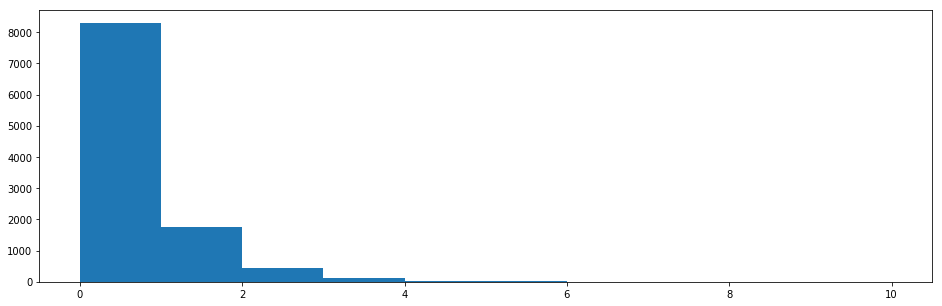

In [32]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

def viz_hist(analysing_dataset: Dataset) -> []:
    labels = []
    for item in analysing_dataset.get_items():
        if item[1] == -1:
            labels.append(0)
            continue

        labels.append(len(item[1]))
            
    print('Label values', set(labels))

    plt.hist(labels)
    plt.show()
    
viz_hist(dataset)

Analyse data sizes

{1024}


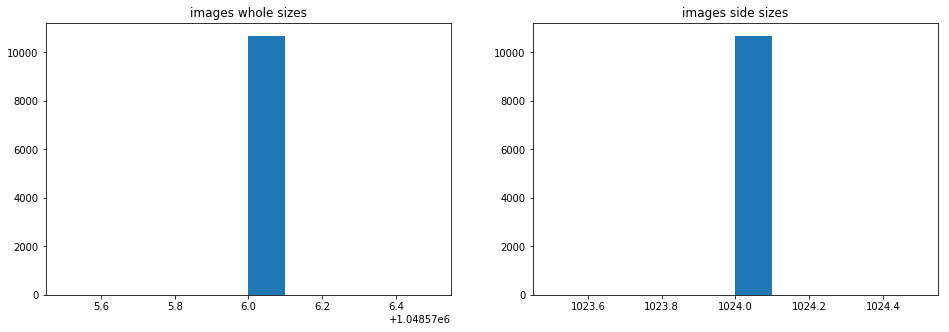

In [33]:
images_side_sizes = []
images_sizes = []

for it in dataset:
    images_side_sizes.append(it['data'].shape[0])
    images_sizes.append(it['data'].shape[0] * it['data'].shape[1])

print(set(images_side_sizes))
fig, axs = plt.subplots(1,2)
axs[0].hist(images_sizes)
axs[0].set_title('images whole sizes')
axs[1].hist(images_side_sizes)
axs[1].set_title('images side sizes')
plt.show()

Analyse dataset train part

8540
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 10}


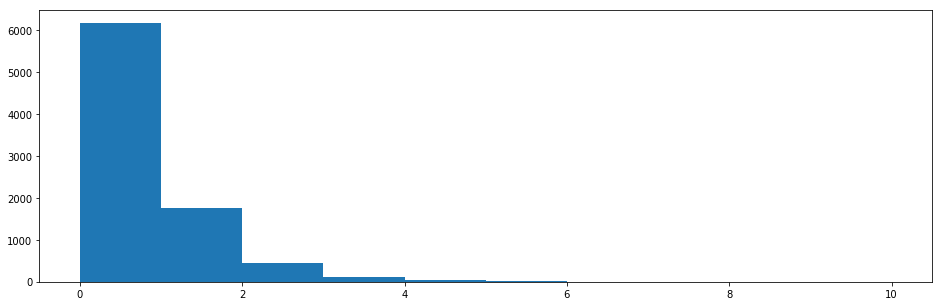

In [38]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

train_dataset = Dataset(is_test=False).load_indices('../data/indices/train.npy', remove_unused=True)
print(len(train_dataset))

viz_hist(train_dataset)

Analyse dataset validation part

2135
Label values {0, 1, 3}


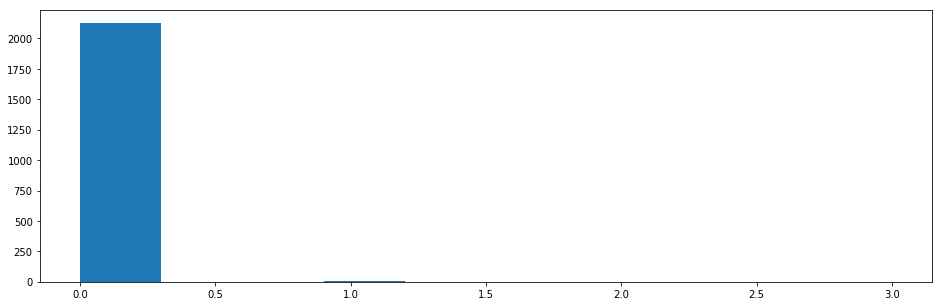

In [39]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False).load_indices('../data/indices/val.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)